In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

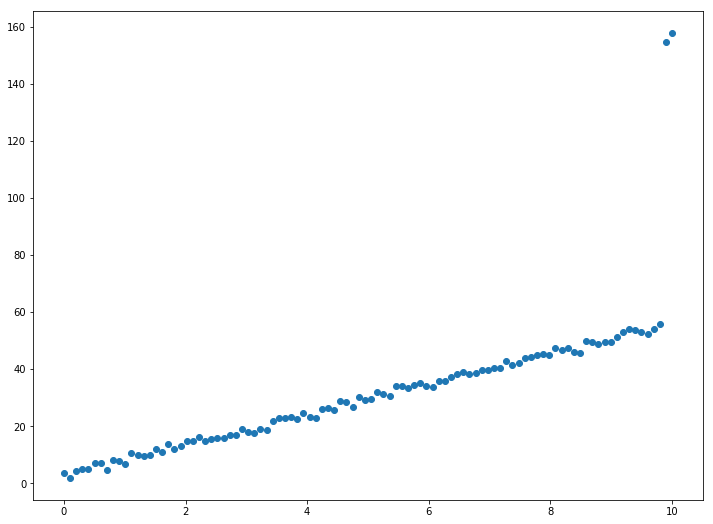

In [15]:
# Simulate data

N = 100

x = np.linspace(0, 10, N)
PHI = np.vstack((np.array([1]*N), x)).T
w_true = np.array([2.7, 5.4])

y = PHI.dot(w_true) + np.random.randn(N)
y[-1] += 100
y[-2] += 100

plt.figure(figsize = (12, 9))
plt.scatter(x, y)

In [58]:
# Fit the model

lmbda = 321.24
I_reg = np.identity(2)
I_reg[0, 0] = 0

w = np.linalg.solve(PHI.T.dot(PHI), PHI.T.dot(y))
w_l2 = np.linalg.solve(PHI.T.dot(PHI) + lmbda*np.identity(2), PHI.T.dot(y))

y_hat = PHI.dot(w)
y_hat_l2 = PHI.dot(w_l2)

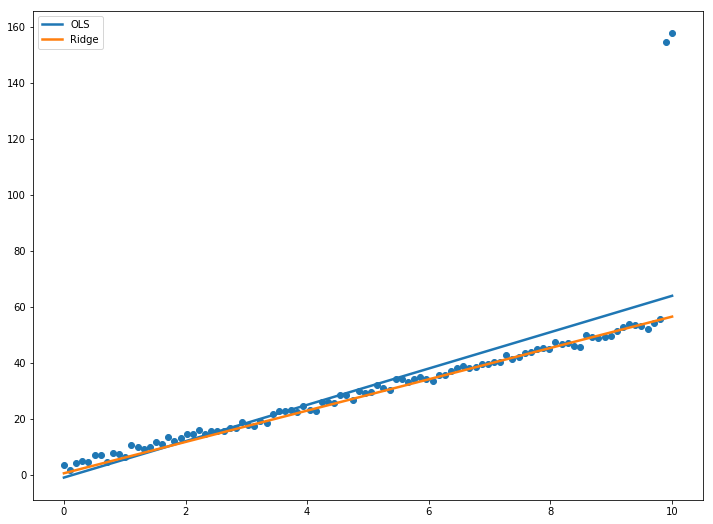

In [59]:
# Visualise the different fits

plt.figure(figsize = (12, 9))
plt.scatter(x, y)
plt.plot(x, y_hat, label = "OLS", linewidth = 2.5)
plt.plot(x, y_hat_l2, label = "Ridge", linewidth = 2.5)
plt.legend()

In [60]:
# Report the R-squared value

R2 = 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)
R2_l2 = 1 - np.sum((y - y_hat_l2)**2) / np.sum((y - y.mean())**2)

print("OLS R-squared: {}".format(R2))
print("Ridge R-squared: {}".format(R2_l2))

OLS R-squared: 0.65701020004
Ridge R-squared: 0.62850130869
